## Calculate average distance in an n-dimensional unit cube using numerical integration

In [1]:
import scipy.integrate as integrate
import numpy

In [2]:
# Probability density for a length x in a unit interval 0 .. 1
ProbLen = lambda x: 2*(1-x)

In [3]:
# Average length in unit interval (1-dimension case) using integrate.quad function of scipy
Integrand1 = lambda x: ProbLen(x)*x
AveDist1 = integrate.quad(Integrand1, 0, 1)
AveDist1

(0.3333333333333333, 3.700743415417188e-15)

Now use n-dimensional integration (integrate.nquad) for dimensions > 1.

First define some functions that are required by integrate.nquad: integrand and integration bounds for each dimension.

In [4]:
# Define integral bounds functions for different numbers of arguments
# There are no dependencies between dimension bounds in n-cube: each dimension has unit interval as bounds
UnitInterval = [0, 1]
def UnitInterval0(): return UnitInterval
def UnitInterval1(x1): return UnitInterval
def UnitInterval2(x1, x2): return UnitInterval
def UnitInterval3(x1, x2, x3): return UnitInterval
def UnitInterval4(x1, x2, x3, x4): return UnitInterval
def UnitInterval5(x1, x2, x3, x4, x5): return UnitInterval
def UnitInterval6(x1, x2, x3, x4, x5, x6): return UnitInterval
def UnitInterval7(x1, x2, x3, x4, x5, x6, x7): return UnitInterval

# define integral bounds for the n-dim unit cubes
UnitSquare = [UnitInterval1, UnitInterval0]
Unit3Cube = [UnitInterval2, UnitInterval1, UnitInterval0]
Unit4Cube = [UnitInterval3, UnitInterval2, UnitInterval1, UnitInterval0]
Unit5Cube = [UnitInterval4, UnitInterval3, UnitInterval2, UnitInterval1, UnitInterval0]
Unit6Cube = [UnitInterval5, UnitInterval4, UnitInterval3, UnitInterval2, UnitInterval1, UnitInterval0]
Unit7Cube = [UnitInterval6, UnitInterval5, UnitInterval4, UnitInterval3, UnitInterval2, UnitInterval1, UnitInterval0]
Unit8Cube = [UnitInterval7, UnitInterval6, UnitInterval5, UnitInterval4, UnitInterval3, UnitInterval2, UnitInterval1, UnitInterval0]

# define joint probability density functions for lengths 
def JpdfLen2(x1, x2): return ProbLen(x1)*ProbLen(x2)
def JpdfLen3(x1, x2, x3): return JpdfLen2(x1, x2)*ProbLen(x3)
def JpdfLen4(x1, x2, x3, x4): return JpdfLen3(x1, x2, x3) * ProbLen(x4)
def JpdfLen5(x1, x2, x3, x4, x5): return JpdfLen4(x1, x2, x3, x4) * ProbLen(x5)
def JpdfLen6(x1, x2, x3, x4, x5, x6): return JpdfLen5(x1, x2, x3, x4, x5) * ProbLen(x6)
def JpdfLen7(x1, x2, x3, x4, x5, x6, x7): return JpdfLen6(x1, x2, x3, x4, x5, x6) * ProbLen(x7)
def JpdfLen8(x1, x2, x3, x4, x5, x6, x7, x8): return JpdfLen7(x1, x2, x3, x4, x5, x6, x7) * ProbLen(x8)

# define length functions for different numbers of arguments
def Len2(x1, x2): return (x1**2 + x2**2)**(1/2)
def Len3(x1, x2, x3): return (x1**2 + x2**2 + x3**2)**(1/2)
def Len4(x1, x2, x3, x4): return (x1**2 + x2**2 + x3**2 + x4**2)**(1/2)
def Len5(x1, x2, x3, x4, x5): return (x1**2 + x2**2 + x3**2 + x4**2 + x5**2)**(1/2)
def Len6(x1, x2, x3, x4, x5, x6): return (x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2)**(1/2)
def Len7(x1, x2, x3, x4, x5, x6, x7): return (x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2 + x7**2)**(1/2)
def Len8(x1, x2, x3, x4, x5, x6, x7, x8): return (x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2 + x7**2 + x8**2)**(1/2)

In [5]:
def Integrand2(x1, x2): return JpdfLen2(x1, x2) * Len2(x1, x2)
AveDist2 = integrate.nquad(Integrand2, UnitSquare)
AveDist2

(0.5214054331646479, 1.4318456148204557e-08)

In [6]:
def Integrand3(x1, x2, x3): return JpdfLen3(x1, x2, x3) * Len3(x1, x2, x3)
AveDist3 = integrate.nquad(Integrand3, Unit3Cube)
AveDist3

(0.6617071822676974, 1.7652123040469985e-08)

In [7]:
def Integrand4(x1, x2, x3, x4): return JpdfLen4(x1, x2, x3, x4) * Len4(x1, x2, x3, x4)
AveDist4 = integrate.nquad(Integrand4, Unit4Cube)
AveDist4

(0.777665653584084, 3.662406173104839e-08)

In [8]:
def Integrand5(x1, x2, x3, x4, x5): return JpdfLen5(x1, x2, x3, x4, x5) * Len5(x1, x2, x3, x4, x5)
AveDist5 = integrate.nquad(Integrand5, Unit5Cube)
AveDist5

(0.8785309152673989, 7.304767804244546e-08)

In [9]:
def Integrand6(x1, x2, x3, x4, x5, x6): return JpdfLen6(x1, x2, x3, x4, x5, x6) * Len6(x1, x2, x3, x4, x5, x6)
AveDist6 = integrate.nquad(Integrand6, Unit6Cube)
AveDist6

(0.9689420830367443, 1.5055757006004862e-07)

In [10]:
def Integrand7(x1, x2, x3, x4, x5, x6, x7): return JpdfLen7(x1, x2, x3, x4, x5, x6, x7) * Len7(x1, x2, x3, x4, x5, x6, x7)
AveDist7 = integrate.nquad(Integrand7, Unit7Cube)
AveDist7

(1.0515838734368514, 3.063633326399822e-07)

In [11]:
def Integrand8(x1, x2, x3, x4, x5, x6, x7, x8): return JpdfLen8(x1, x2, x3, x4, x5, x6, x7, x8) * Len8(x1, x2, x3, x4, x5, x6, x7, x8)
AveDist8 = integrate.nquad(Integrand8, Unit8Cube)
AveDist8

(1.1281653402412601, 6.122054406958004e-07)

In [12]:
print(AveDist1[0]**2 / 1)
print(AveDist2[0]**2 / 2)
print(AveDist3[0]**2 / 3)
print(AveDist4[0]**2 / 4)
print(AveDist5[0]**2 / 5)
print(AveDist6[0]**2 / 6)
print(AveDist7[0]**2 / 7)
print(AveDist8[0]**2 / 8)

0.1111111111111111
0.13593181286680708
0.14595213168821858
0.15119096719109015
0.15436331381611473
0.15647479337993087
0.1579755204103503
0.1590946293652098


In [13]:
AverageDistances = [AveDist1[0], AveDist2[0], AveDist3[0], AveDist4[0], AveDist5[0], AveDist6[0], AveDist7[0], AveDist8[0]]

Text(0.5, 0.98, 'Average distance in n-dim unit cube')

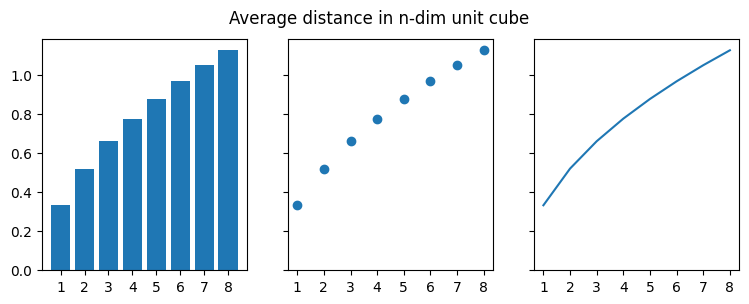

In [14]:
import matplotlib.pyplot as plt

data = {'1': AveDist1[0], '2': AveDist2[0], '3': AveDist3[0], '4': AveDist4[0], '5': AveDist5[0], '6': AveDist6[0], '7': AveDist7[0], '8': AveDist8[0] }
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Average distance in n-dim unit cube')